In [315]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [316]:
tr = pd.read_csv('heart_train.csv')
tt = pd.read_csv('heart_test.csv')
tr.head().T

,0,1,2,3,4
Age,40.0,49.0,37.0,48.0,NaN
Sex,M,F,M,F,M
ChestPainType,ATA,NAP,ATA,ASY,NAP
RestingBP,140.0,160.0,130.0,138.0,120.0
Cholesterol,289.0,180.0,283.0,214.0,339.0
FastingBS,0.0,0.0,0.0,0.0,0.0
RestingECG,Normal,Normal,ST,Normal,Normal
MaxHR,172.0,156.0,98.0,108.0,170.0
ExerciseAngina,N,N,N,Y,N
Oldpeak,0.0,1.0,0.0,1.5,0.0


In [317]:
tt.head().T

,0,1,2,3,4
Age,51.0,60.0,52.0,61.0,60.0
Sex,F,F,F,M,M
ChestPainType,ASY,NAP,NAP,ASY,ASY
RestingBP,160.0,120.0,125.0,110.0,130.0
Cholesterol,303.0,178.0,272.0,0.0,206.0
FastingBS,0.0,1.0,0.0,1.0,0.0
RestingECG,Normal,Normal,Normal,Normal,LVH
MaxHR,150.0,96.0,139.0,108.0,132.0
ExerciseAngina,Y,N,N,Y,Y
Oldpeak,1.0,0.0,0.0,2.0,2.4


In [318]:
tr.drop_duplicates(inplace=True)

In [319]:
num_cols=tr.columns.to_list()

In [320]:
num_cols

['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope',
 'HeartDisease']

In [321]:
new_num_cols = []
for i in num_cols:
    try:
        tr[i].astype(float)
        new_num_cols.append(i)
    except ValueError:
        pass
new_num_cols

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

In [322]:
cat_cols = list(set(tr.columns) - set(new_num_cols))
cat_cols

['ST_Slope', 'ExerciseAngina', 'ChestPainType', 'RestingECG', 'Sex']

In [323]:
noise=[]
for i in new_num_cols:
    noise.append(i)
    for j in tr[i]:
        try:
            float(j)
        except:
            noise.append(j)
    print(noise)
    noise.clear()


['Age']
['RestingBP']
['Cholesterol']
['FastingBS']
['MaxHR']
['Oldpeak']
['HeartDisease']


In [324]:
for i in new_num_cols:
    median_val = tr[i].median()
    tr[i].fillna(median_val,inplace=True)


In [325]:
for i in cat_cols:
    mode_val = tr[i].mode().iloc[0]
    tr[i].fillna(mode_val,inplace=True)

In [326]:
tr_desc = pd.DataFrame(index = list(tr))
tr_desc['count'] = tr.shape[0]
tr_desc['null_cnt'] = tr.isnull().sum()
tr_desc['nunique'] = tr.nunique()
tr_desc['dtypes'] = tr.dtypes
tr_desc = pd.concat([tr_desc,tr.describe().T],axis=1)
tr_desc

,count,null_cnt,nunique,dtypes,count,mean,std,min,25%,50%,75%,max
Age,741,0,49,float64,741.0,53.466937,9.496972,28.0,47.0,54.0,60.0,77.0
Sex,741,0,2,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ChestPainType,741,0,4,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RestingBP,741,0,66,float64,741.0,132.053981,18.520691,0.0,120.0,130.0,140.0,200.0
Cholesterol,741,0,209,float64,741.0,202.148448,110.171290,0.0,175.0,224.0,269.0,603.0
FastingBS,741,0,2,float64,741.0,0.240216,0.427503,0.0,0.0,0.0,0.0,1.0
RestingECG,741,0,3,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MaxHR,741,0,115,float64,741.0,137.819163,25.135411,63.0,120.0,139.0,156.0,202.0
ExerciseAngina,741,0,2,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Oldpeak,741,0,52,float64,741.0,0.901619,1.096467,-2.6,0.0,0.6,1.5,6.2


In [327]:
tt_desc = pd.DataFrame(index = list(tt))
tt_desc['count'] = tt.shape[0]
tt_desc['null_cnt'] = tt.isnull().sum()
tt_desc['nunique'] = tt.nunique()
tt_desc['dtypes'] = tt.dtypes
tt_desc = pd.concat([tt_desc,tt.describe().T],axis=1)
tt_desc

,count,null_cnt,nunique,dtypes,count,mean,std,min,25%,50%,75%,max
Age,177,0,39,float64,177.0,53.920904,8.976261,30.0,48.0,54.0,60.0,76.0
Sex,177,0,2,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ChestPainType,177,0,4,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RestingBP,177,0,40,float64,177.0,133.887006,18.442746,98.0,120.0,130.0,140.0,200.0
Cholesterol,177,0,102,float64,177.0,186.084746,104.266969,0.0,161.0,218.0,257.0,358.0
FastingBS,177,0,2,float64,177.0,0.203390,0.403662,0.0,0.0,0.0,0.0,1.0
RestingECG,177,0,3,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MaxHR,177,0,78,float64,177.0,132.723164,26.368179,60.0,112.0,130.0,152.0,190.0
ExerciseAngina,177,0,2,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Oldpeak,177,0,26,float64,177.0,0.834463,0.927606,0.0,0.0,0.5,1.5,3.5


In [328]:
li=[]
for i in tr.columns:
    if tr[i].nunique()>10:
        pass
    else:
        li.append(i)
        li.append(tr[i].unique())
        print(li)
    li.clear()


['Sex', array(['M', 'F'], dtype=object)]
['ChestPainType', array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)]
['FastingBS', array([0., 1.])]
['RestingECG', array(['Normal', 'ST', 'LVH'], dtype=object)]
['ExerciseAngina', array(['N', 'Y'], dtype=object)]
['ST_Slope', array(['Up', 'Flat', 'Down'], dtype=object)]
['HeartDisease', array([0, 1], dtype=int64)]


C:\Users\farzi\AppData\Local\Temp\ipykernel_16932\2249201699.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_mat = tr.corr()


<Axes: >

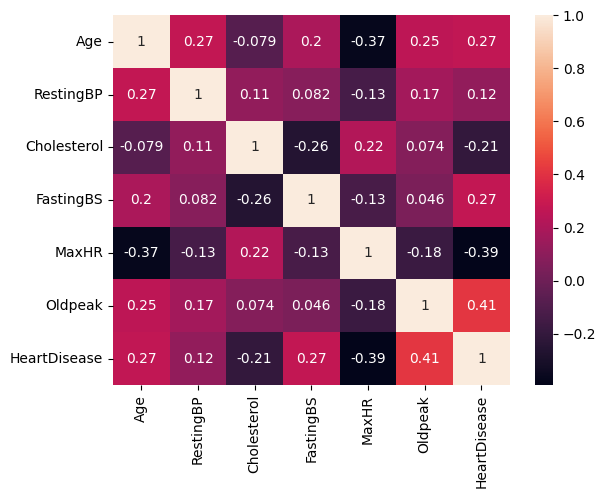

In [329]:
cor_mat = tr.corr()
sns.heatmap(cor_mat,annot=True)

<Axes: xlabel='ChestPainType', ylabel='Count'>

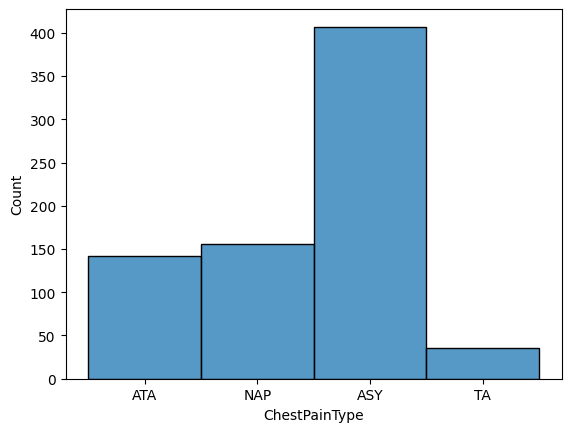

In [330]:
sns.histplot(tr,x=tr['ChestPainType'])

<Axes: xlabel='RestingECG', ylabel='Count'>

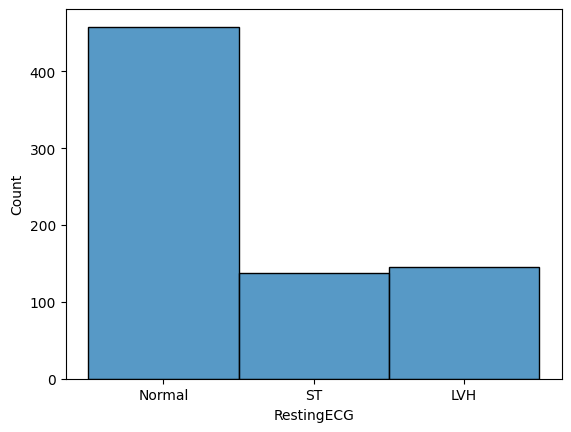

In [331]:
sns.histplot(tr,x=tr['RestingECG'])

<Axes: xlabel='HeartDisease', ylabel='Count'>

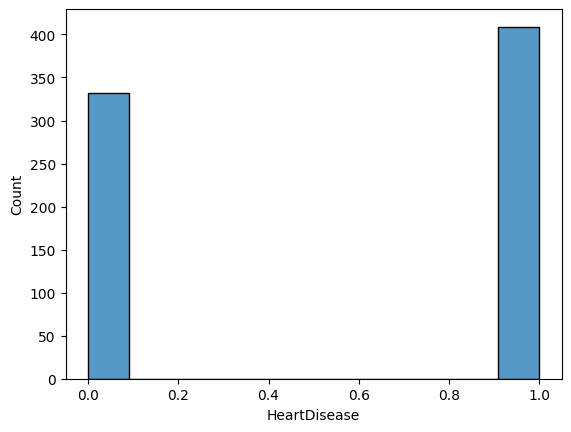

In [332]:
sns.histplot(tr,x=tr['HeartDisease'])

C:\Users\farzi\AppData\Local\Temp\ipykernel_16932\1067575344.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tr['Age'])


<Axes: xlabel='Age', ylabel='Density'>

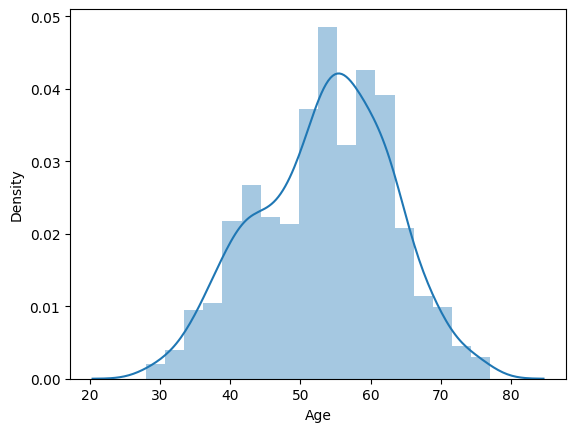

In [333]:
sns.distplot(tr['Age'])

C:\Users\farzi\AppData\Local\Temp\ipykernel_16932\2478414344.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tr['Cholesterol'])


<Axes: xlabel='Cholesterol', ylabel='Density'>

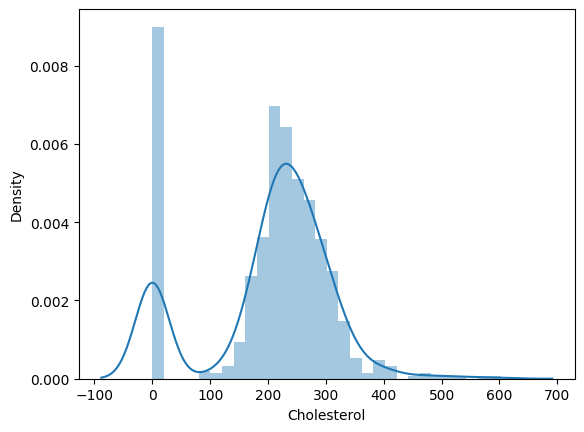

In [334]:
sns.distplot(tr['Cholesterol'])

C:\Users\farzi\AppData\Local\Temp\ipykernel_16932\3249351973.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tr['MaxHR'])


<Axes: xlabel='MaxHR', ylabel='Density'>

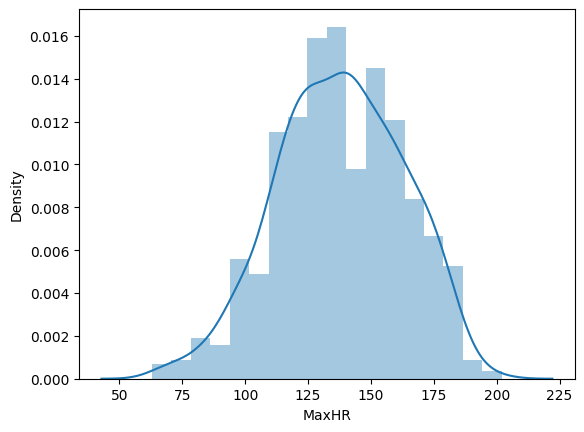

In [335]:
sns.distplot(tr['MaxHR'])

c:\Users\farzi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


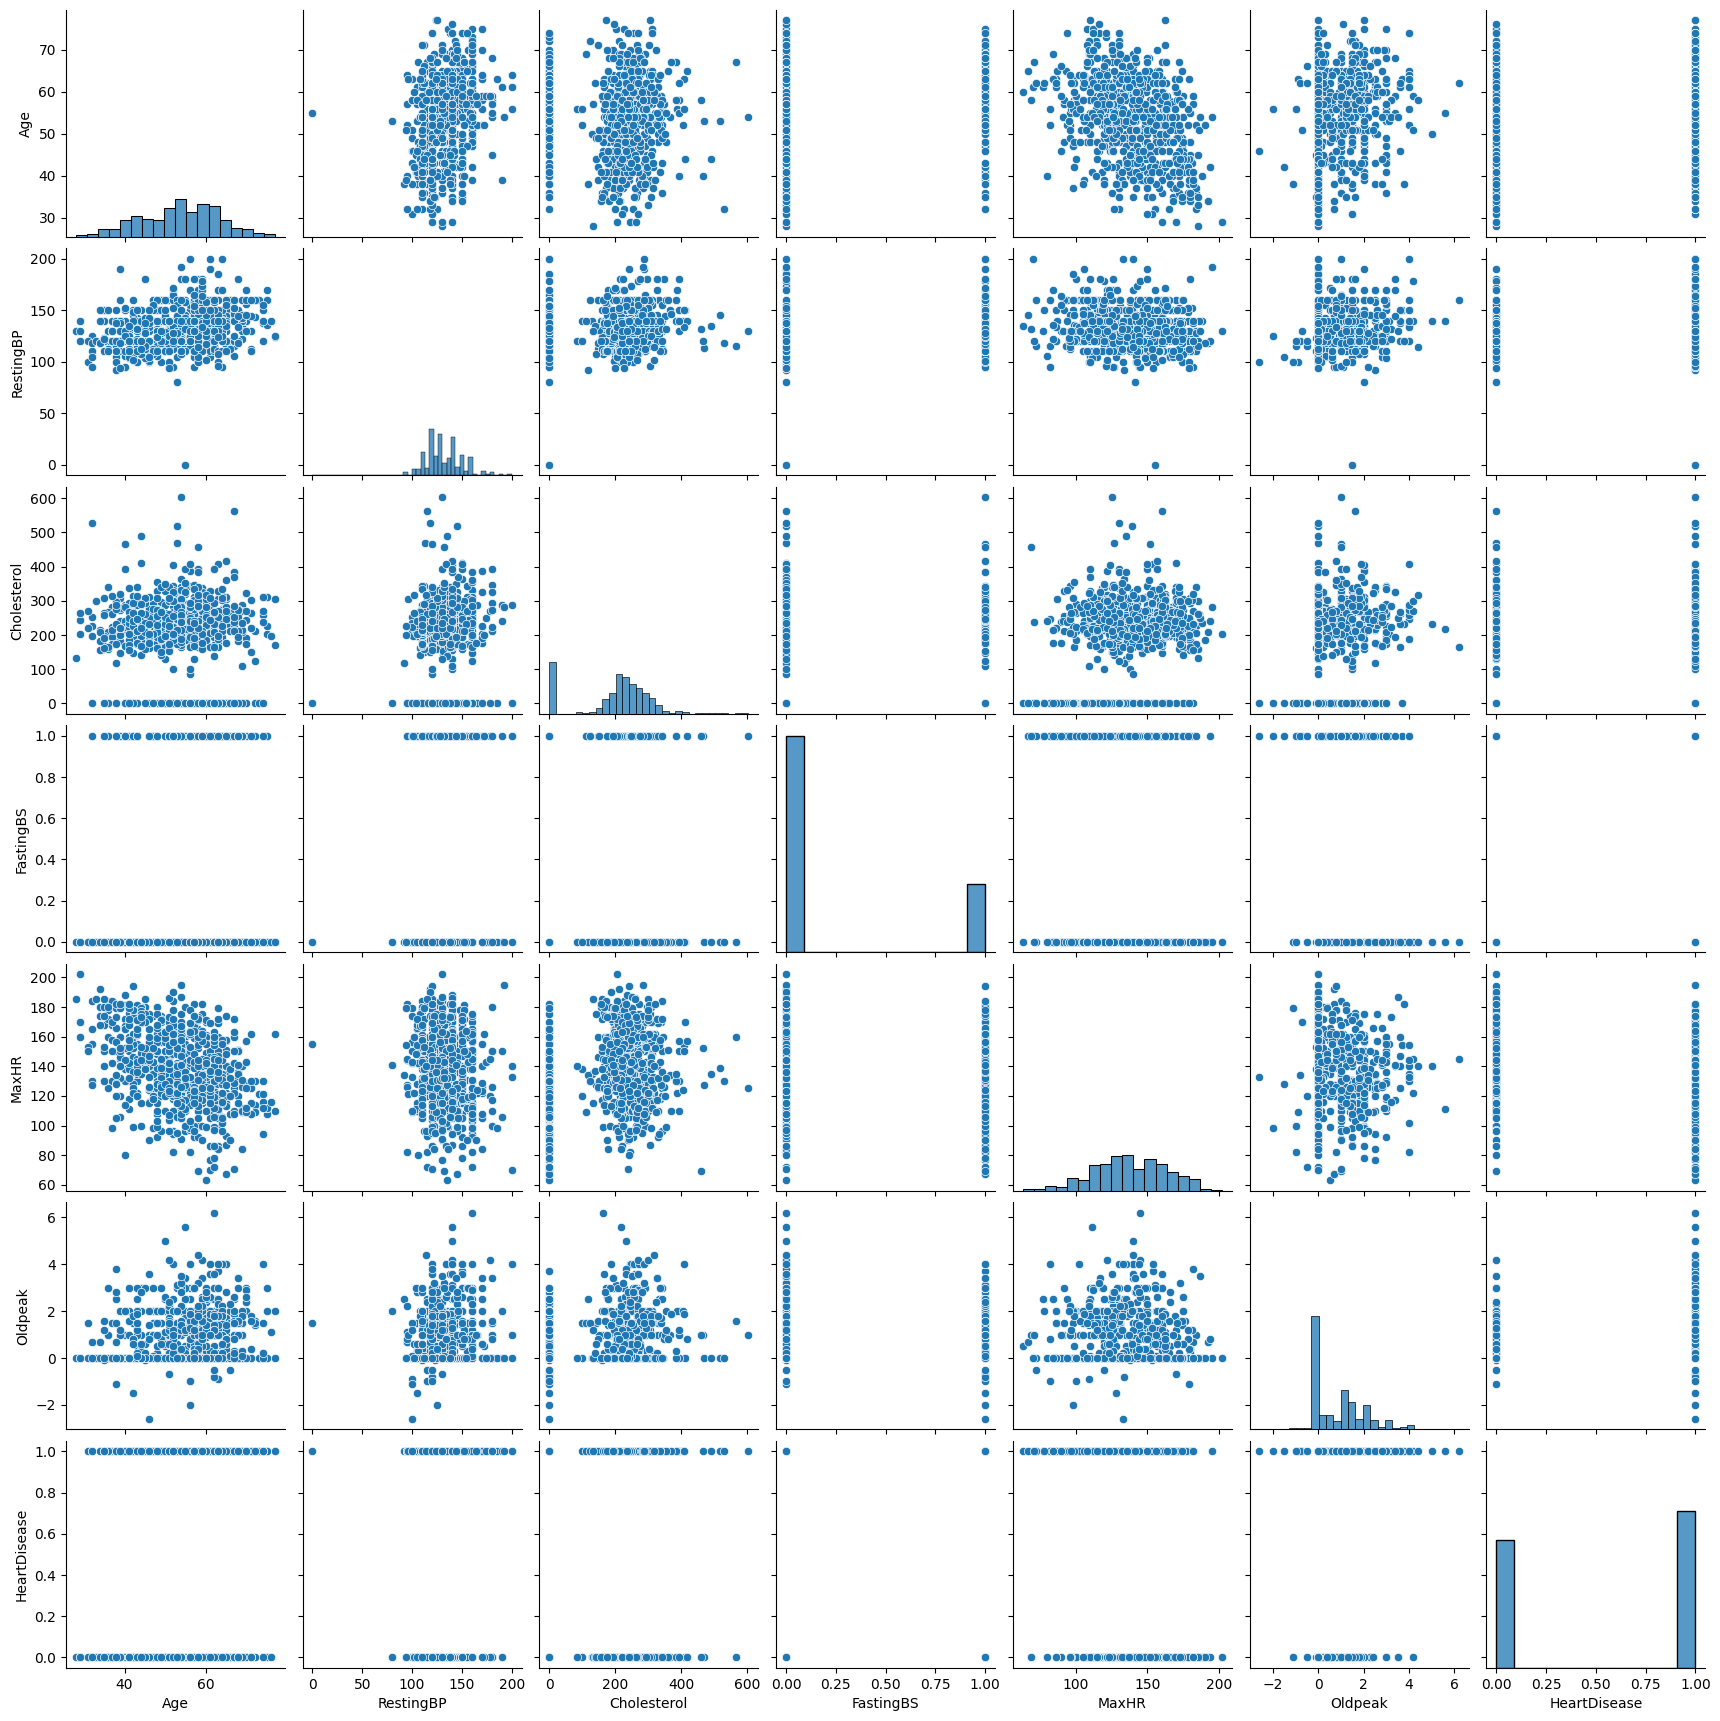

In [336]:
sns.pairplot(tr)

In [337]:
tr.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [338]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
to_label_encode=[]
to_scale=[]
to_one_hot=[]
for i in tr.columns:
    if tr[i].dtype == 'int64' or tr[i].dtype == 'float64':
        if tr[i].nunique()==2:
            pass
        elif tr[i].nunique()<=10:
            to_one_hot.append(i)
        else:
            to_scale.append(i)
    else:
        if tr[i].nunique()==2:
            to_label_encode.append(i)
        else:
            to_one_hot.append(i)
        
    

In [339]:
to_label_encode

['Sex', 'ExerciseAngina']

In [340]:
to_one_hot

['ChestPainType', 'RestingECG', 'ST_Slope']

In [341]:
to_scale

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [342]:
scaler = StandardScaler()
tr[to_scale] = scaler.fit_transform(tr[to_scale])
tr

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.418982,M,ATA,0.429324,0.788864,0.0,Normal,1.360786,N,-0.822850,Up,0
1,-0.470671,F,NAP,1.509927,-0.201172,0.0,Normal,0.723804,N,0.089786,Flat,1
2,-1.735085,M,ATA,-0.110977,0.734367,0.0,ST,-1.585256,N,-0.822850,Up,0
3,-0.576039,F,ASY,0.321264,0.107647,0.0,Normal,-1.187142,Y,0.546104,Flat,1
4,0.056168,M,NAP,-0.651278,1.243010,0.0,Normal,1.281164,N,-0.822850,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
736,0.372271,F,ASY,0.429324,0.352885,0.0,Normal,-0.589971,Y,-0.640323,Flat,1
737,1.531317,M,ASY,0.645445,-0.083094,1.0,Normal,0.126634,N,2.280112,Flat,1
738,0.372271,M,ASY,-0.110977,-0.646235,0.0,Normal,-0.908462,Y,0.272313,Flat,1
739,0.372271,F,ATA,-0.110977,0.307470,0.0,LVH,1.440409,N,-0.822850,Flat,1


In [343]:
scaler = StandardScaler()
tt[to_scale] = scaler.fit_transform(tt[to_scale])
tt

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-0.326326,F,ASY,1.419912,1.124488,0.0,Normal,0.657074,Y,0.178962,Flat,1
1,0.679163,F,NAP,-0.755115,-0.077759,1.0,Normal,-1.396659,N,-0.902140,Up,0
2,-0.214605,F,NAP,-0.483237,0.826331,0.0,Normal,0.238721,N,-0.902140,Up,0
3,0.790884,M,ASY,-1.298872,-1.789758,1.0,Normal,-0.940274,Y,1.260064,Down,1
4,0.679163,M,ASY,-0.211359,0.191544,0.0,LVH,-0.027503,Y,1.692505,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
172,1.796373,M,ASY,-1.026994,-1.789758,0.0,ST,-1.548787,Y,-0.902140,Flat,1
173,0.790884,M,ASY,0.767404,0.162690,0.0,Normal,1.075427,N,-0.902140,Up,1
174,-2.337304,F,ASY,-1.842629,0.576263,0.0,Normal,0.657074,Y,0.178962,Flat,1
175,-1.220094,M,ASY,-0.646364,-1.789758,0.0,Normal,-0.483888,N,-0.361589,Up,1


In [344]:
encoder = LabelEncoder()
tr[to_label_encode] = tr[to_label_encode].apply(encoder.fit_transform)
tr

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.418982,1,ATA,0.429324,0.788864,0.0,Normal,1.360786,0,-0.822850,Up,0
1,-0.470671,0,NAP,1.509927,-0.201172,0.0,Normal,0.723804,0,0.089786,Flat,1
2,-1.735085,1,ATA,-0.110977,0.734367,0.0,ST,-1.585256,0,-0.822850,Up,0
3,-0.576039,0,ASY,0.321264,0.107647,0.0,Normal,-1.187142,1,0.546104,Flat,1
4,0.056168,1,NAP,-0.651278,1.243010,0.0,Normal,1.281164,0,-0.822850,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
736,0.372271,0,ASY,0.429324,0.352885,0.0,Normal,-0.589971,1,-0.640323,Flat,1
737,1.531317,1,ASY,0.645445,-0.083094,1.0,Normal,0.126634,0,2.280112,Flat,1
738,0.372271,1,ASY,-0.110977,-0.646235,0.0,Normal,-0.908462,1,0.272313,Flat,1
739,0.372271,0,ATA,-0.110977,0.307470,0.0,LVH,1.440409,0,-0.822850,Flat,1


In [345]:
encoder = LabelEncoder()
tt[to_label_encode] = tt[to_label_encode].apply(encoder.fit_transform)
tt

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-0.326326,0,ASY,1.419912,1.124488,0.0,Normal,0.657074,1,0.178962,Flat,1
1,0.679163,0,NAP,-0.755115,-0.077759,1.0,Normal,-1.396659,0,-0.902140,Up,0
2,-0.214605,0,NAP,-0.483237,0.826331,0.0,Normal,0.238721,0,-0.902140,Up,0
3,0.790884,1,ASY,-1.298872,-1.789758,1.0,Normal,-0.940274,1,1.260064,Down,1
4,0.679163,1,ASY,-0.211359,0.191544,0.0,LVH,-0.027503,1,1.692505,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
172,1.796373,1,ASY,-1.026994,-1.789758,0.0,ST,-1.548787,1,-0.902140,Flat,1
173,0.790884,1,ASY,0.767404,0.162690,0.0,Normal,1.075427,0,-0.902140,Up,1
174,-2.337304,0,ASY,-1.842629,0.576263,0.0,Normal,0.657074,1,0.178962,Flat,1
175,-1.220094,1,ASY,-0.646364,-1.789758,0.0,Normal,-0.483888,0,-0.361589,Up,1


In [346]:
tr = pd.get_dummies(data=tr,columns=to_one_hot,drop_first=True)
tr

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,-1.418982,1,0.429324,0.788864,0.0,1.360786,0,-0.822850,0,1,0,0,1,0,0,1
1,-0.470671,0,1.509927,-0.201172,0.0,0.723804,0,0.089786,1,0,1,0,1,0,1,0
2,-1.735085,1,-0.110977,0.734367,0.0,-1.585256,0,-0.822850,0,1,0,0,0,1,0,1
3,-0.576039,0,0.321264,0.107647,0.0,-1.187142,1,0.546104,1,0,0,0,1,0,1,0
4,0.056168,1,-0.651278,1.243010,0.0,1.281164,0,-0.822850,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,0.372271,0,0.429324,0.352885,0.0,-0.589971,1,-0.640323,1,0,0,0,1,0,1,0
737,1.531317,1,0.645445,-0.083094,1.0,0.126634,0,2.280112,1,0,0,0,1,0,1,0
738,0.372271,1,-0.110977,-0.646235,0.0,-0.908462,1,0.272313,1,0,0,0,1,0,1,0
739,0.372271,0,-0.110977,0.307470,0.0,1.440409,0,-0.822850,1,1,0,0,0,0,1,0


In [347]:
tt = pd.get_dummies(data=tt,columns=to_one_hot,drop_first=True)
tt

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,-0.326326,0,1.419912,1.124488,0.0,0.657074,1,0.178962,1,0,0,0,1,0,1,0
1,0.679163,0,-0.755115,-0.077759,1.0,-1.396659,0,-0.902140,0,0,1,0,1,0,0,1
2,-0.214605,0,-0.483237,0.826331,0.0,0.238721,0,-0.902140,0,0,1,0,1,0,0,1
3,0.790884,1,-1.298872,-1.789758,1.0,-0.940274,1,1.260064,1,0,0,0,1,0,0,0
4,0.679163,1,-0.211359,0.191544,0.0,-0.027503,1,1.692505,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,1.796373,1,-1.026994,-1.789758,0.0,-1.548787,1,-0.902140,1,0,0,0,0,1,1,0
173,0.790884,1,0.767404,0.162690,0.0,1.075427,0,-0.902140,1,0,0,0,1,0,0,1
174,-2.337304,0,-1.842629,0.576263,0.0,0.657074,1,0.178962,1,0,0,0,1,0,1,0
175,-1.220094,1,-0.646364,-1.789758,0.0,-0.483888,0,-0.361589,1,0,0,0,1,0,0,1


In [348]:
x_train = tr.drop('HeartDisease',axis=1,inplace=False)
y_train = tr['HeartDisease']

In [349]:
x_test = tt.drop('HeartDisease',axis=1,inplace=False)
y_test = tt['HeartDisease']

In [350]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,precision_score,recall_score
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [351]:
f1_score = f1_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)

In [352]:
print(f1_score,precision,recall)

0.8730964467005075 0.8775510204081632 0.8686868686868687
